<a href="https://colab.research.google.com/github/Jin0331/TA/blob/master/DS_Lab_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **13주차 실습 - 일반화 선형 모형(로지스틱 회귀)**

- - -




### **<로지스틱 회귀분석>**

<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDAzMTNfMjUg/MDAxNTg0MDgwNjAzNDQ4.stg44EjmKsUiCbav6P4HPZpzQocCNcN3L6DUwQBC5lgg.25bRo94dsEGXtmZ-Z0CtQhXKlTVkkz3E5VPaq0oNvXog.PNG.y4769/%EC%8A%AC%EB%9D%BC%EC%9D%B4%EB%93%9C4.PNG?type=w800" width="600" height="300">

  1. 로지스틱 회귀모형은 반응변수가 범주형 자료(이항/다항)이며, 일반화 선형모형(generalized linear model)의 특수한 경우로 S형 곡선을 그리는 함수 모형이다.

  2. 특히, 로지스틱 회귀분석을 위한 종속변수는 이분형으로 0 또는 1의 값을 가지고, 독립변수는 범주형 또는 연속형 모두 가능하다.

  3. 로지스틱 회귀모형은 여러 설명 변수들로부터 두 범주만을 가지는 반응변수를 예측하는데 사용하며, 분석결과 종속변수 값, 즉 확률이 0.5보다 크면 그 사건이 일어나며, 0.5보다 작으면 그 사건이 일어나지 않는 것으로 예측한다.

<br>

### **<독립변수(설명변수)와 종속변수(반응변수)의 관계>**

<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDAzMTNfMTc3/MDAxNTg0MDgwNjAzNDQy.lXx6Ca-LIa0kaeCULOE9wWqUQsZt1KzSOZDKsRpwbREg._lAOicl-kDpLz4SYa9_37_rYCtUNhL_IYFOMYz4v-Hgg.PNG.y4769/%EC%8A%AC%EB%9D%BC%EC%9D%B4%EB%93%9C6.PNG?type=w800" width="600" height="300">

  1. 선형 회귀분석이 말 그대로 독립변수와 종속변수 사이의 선형적 관계를 그래프로 나타낸 것이라면, 로지스틱 회귀분석은 선형이 아닌 "S" 곡선의 특성을 나타낸다.

  2. 로지스틱 회귀분석의 곡선에서 종속변수의 확률이 0.5보다 크면 어떤 사건이 일어난다고 보고, 0.5보다 작으면 어떤 사건이 일어나지 않을 것이라고 확률적으로 예측해볼 수 있다.




```
glm(formula, data, family = "binomial") 
# binomial 옵션은 반응변수가 두 가지의 값(이항)만 가진다고 glm에게 알려줌
```


In [ ]:
install.packages(c("tidyverse", "data.table", "devtools", "ggpubr","PerformanceAnalytics", "caret"))
library(tidyverse)
library(data.table)
library(devtools) 
options(repr.plot.width=10, repr.plot.height=10)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### **A. 예제 1**

---


**UCLA 입학 관련 데이터**

  * admit : 합/불합격 1, 0
  * gre : 미국 대학원 수학능력시험인 gre의 점수
  * gpa : 학부 성적(평균 학점)
  * rank : 출신 대학 순위 1,2,3,4 


In [ ]:
ucla <- fread("https://stats.idre.ucla.edu/stat/data/binary.csv") %>% as_tibble()
ucla %>% show()

# A tibble: 400 x 4
   admit   gre   gpa  rank
   <int> <int> <dbl> <int>
 1     0   380  3.61     3
 2     1   660  3.67     3
 3     1   800  4        1
 4     1   640  3.19     4
 5     0   520  2.93     4
 6     1   760  3        2
 7     1   560  2.98     1
 8     0   400  3.08     2
 9     1   540  3.39     3
10     0   700  3.92     2
# … with 390 more rows


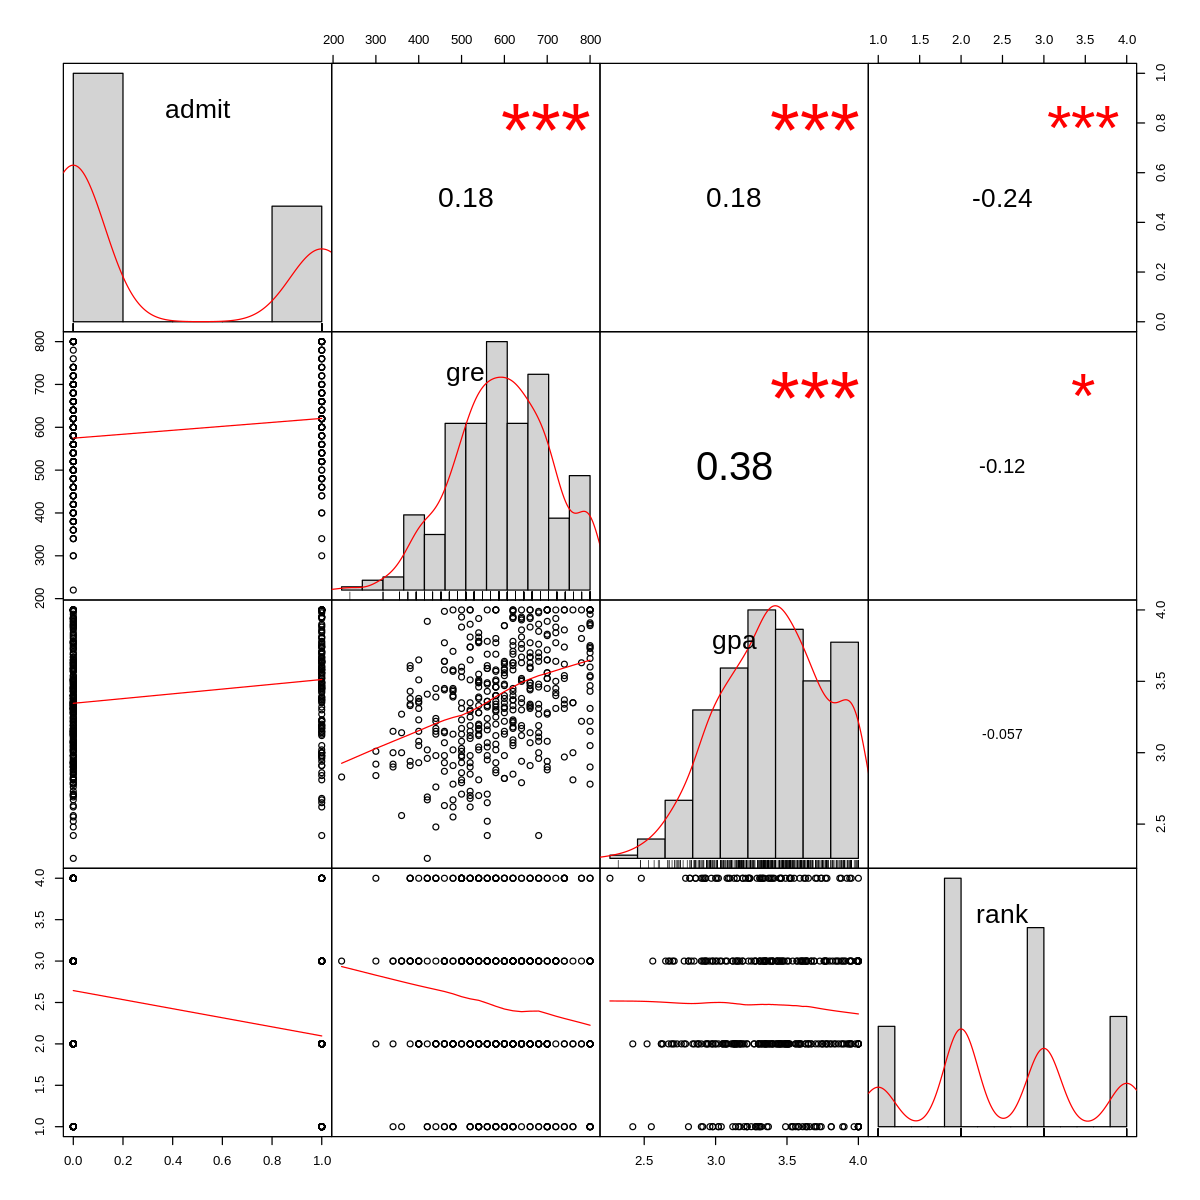

In [ ]:
PerformanceAnalytics::chart.Correlation(ucla)

In [ ]:
?chart.Correlation

* geom_jitter를 이용한 노이즈 추가(admint과 gre의 산점도)

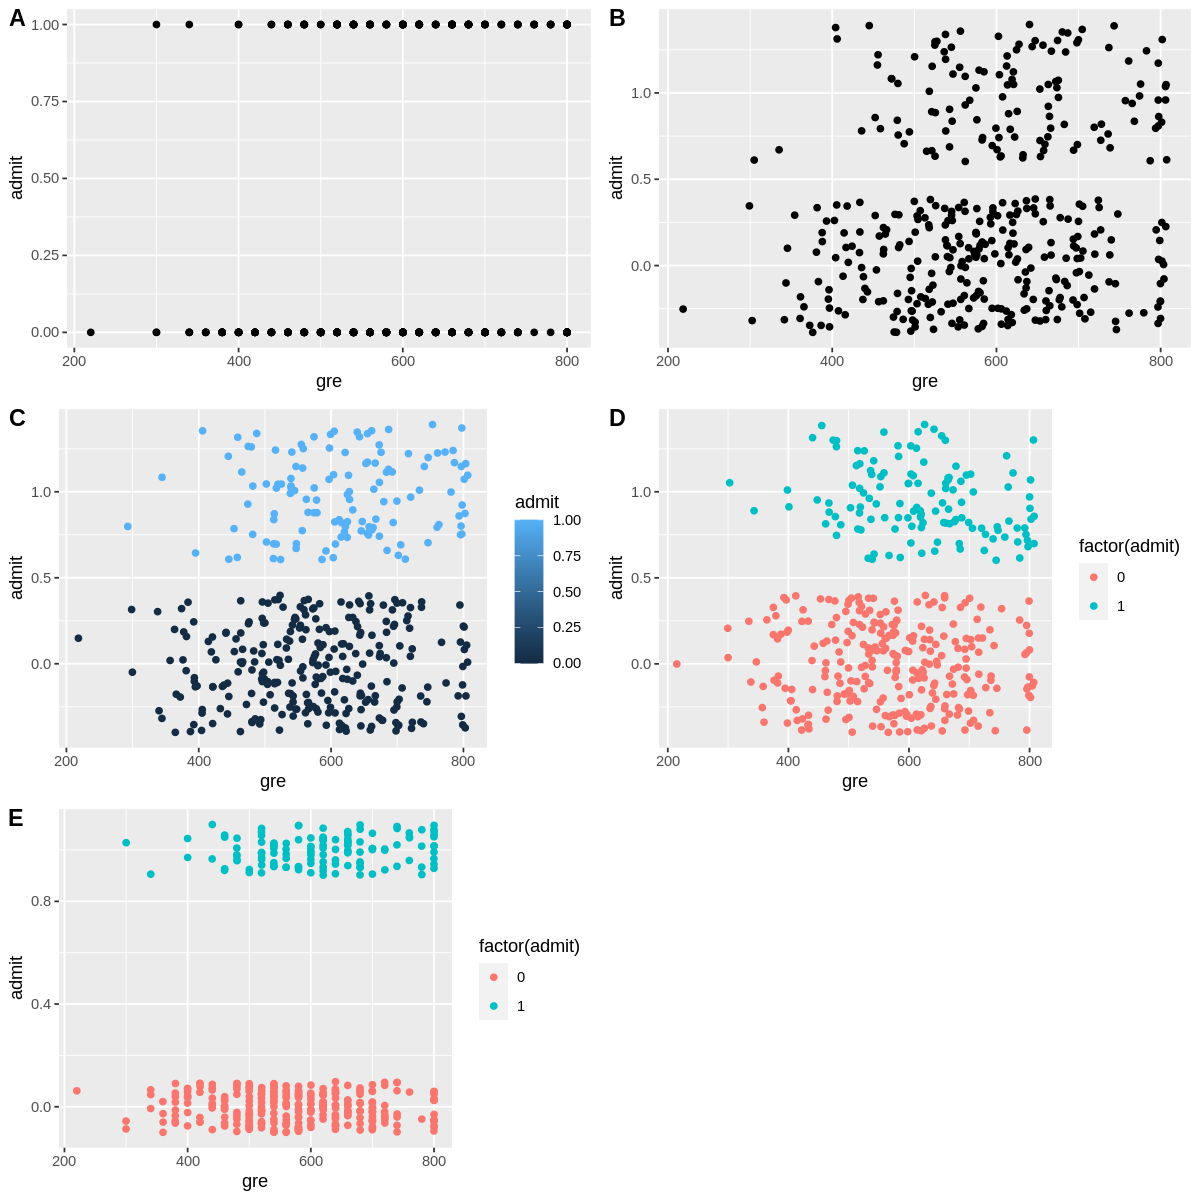

In [ ]:
library(ggpubr)
p1 <- ucla %>% ggplot(aes(gre, admit)) + geom_point()
p2 <- ucla %>% ggplot(aes(gre, admit)) + geom_jitter()
p3 <- ucla %>% ggplot(aes(gre, admit)) + geom_jitter(aes(col = admit))
p4 <- ucla %>% ggplot(aes(gre, admit)) + geom_jitter(aes(col = factor(admit)))
p5 <- ucla %>% ggplot(aes(gre, admit)) + geom_jitter(aes(col = factor(admit)), height = 0.1, width = 0.2)

ggarrange(p1,p2,p3,p4,p5, labels = c("A","B","C","D", "E"), ncol = 2, nrow = 3)

* gpa-admit, rank-admit

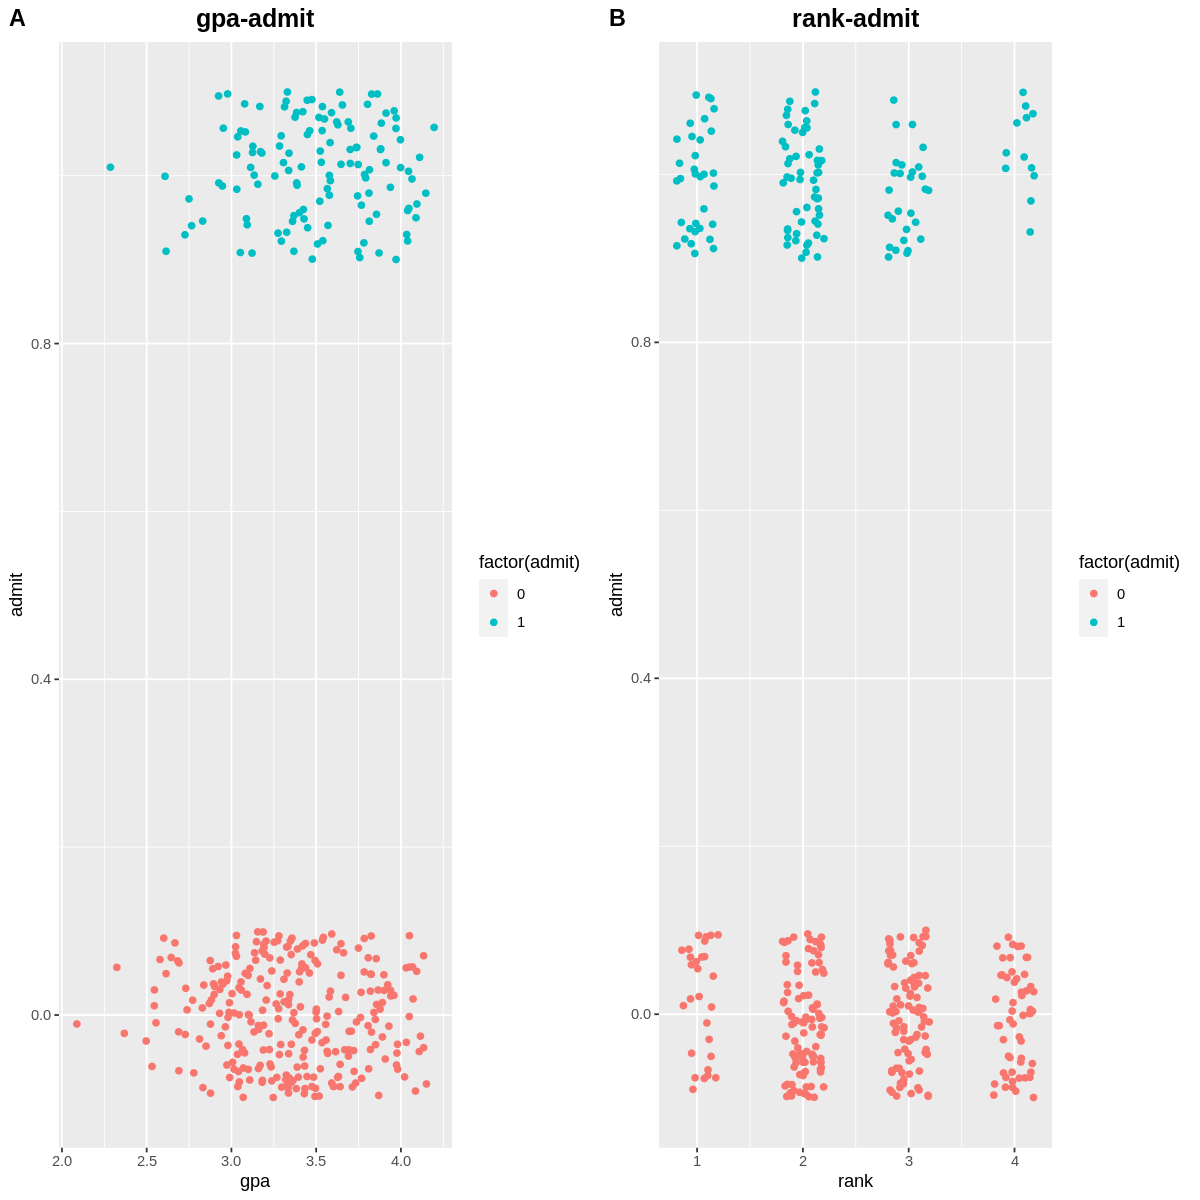

In [ ]:
p1 <- ucla %>% ggplot(aes(gpa, admit)) + geom_jitter(aes(col = factor(admit)), height = 0.1, width = 0.2) +
 ggtitle("gpa-admit") + theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5))

p2 <- ucla %>% ggplot(aes(rank, admit)) + geom_jitter(aes(col = factor(admit)), height = 0.1, width = 0.2) +
 ggtitle("rank-admit") + theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5))

ggarrange(p1,p2, labels = c("A","B"), ncol = 2, nrow = 1)

* **train-test split**

In [ ]:
library(caret) # Classification And REgression Training

set.seed(31)
index <- createDataPartition(y = ucla$admit, p = 0.95, list = FALSE) 
head(index, 5)

Resample1
1
2
3
4
5


In [ ]:
train <- ucla[index, ]
test <- ucla[-index, ]

train %>% show()

# A tibble: 380 x 4
   admit   gre   gpa  rank
   <int> <int> <dbl> <int>
 1     0   380  3.61     3
 2     1   660  3.67     3
 3     1   800  4        1
 4     1   640  3.19     4
 5     0   520  2.93     4
 6     1   760  3        2
 7     1   560  2.98     1
 8     0   400  3.08     2
 9     1   540  3.39     3
10     0   700  3.92     2
# … with 370 more rows


* **train set을 이용한 glm 모델 생성**

In [ ]:
m <- glm(admit ~ ., data = train, family = "binomial")
summary(m)


Call:
glm(formula = admit ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6037  -0.8841  -0.6290   1.1456   2.2008  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.297564   1.156371  -2.852  0.00435 ** 
gre          0.002464   0.001119   2.201  0.02772 *  
gpa          0.725064   0.334335   2.169  0.03011 *  
rank        -0.589678   0.131622  -4.480 7.46e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 475.51  on 379  degrees of freedom
Residual deviance: 435.50  on 376  degrees of freedom
AIC: 443.5

Number of Fisher Scoring iterations: 4


``admit = 0.002294 * gre + 0.777014 * gpa + -0.560031 * rank + -3.297564``

* **예측**

In [ ]:
test %>% show()

# A tibble: 20 x 4
   admit   gre   gpa  rank
   <int> <int> <dbl> <int>
 1     0   540  3.78     4
 2     0   800  3.73     1
 3     0   540  3.12     1
 4     0   700  2.9      4
 5     0   600  3.32     2
 6     1   720  3.64     1
 7     0   720  3.84     3
 8     1   620  3.17     2
 9     0   580  3.3      2
10     0   500  3.53     4
11     0   560  3.59     2
12     1   780  3.8      3
13     1   520  3.9      3
14     0   360  3.27     3
15     0   420  2.26     4
16     1   620  3.45     2
17     0   680  3.9      1
18     1   460  3.64     3
19     0   620  3.43     3
20     0   540  2.7      2


In [ ]:
predict(m, newdata = test %>% select(-admit), type = "response") %>%
 tibble(predict_admit = .) %>% bind_cols(test, .)

admit,gre,gpa,rank,predict_admit
<int>,<int>,<dbl>,<int>,<dbl>
0,540,3.78,4,0.17009335
0,800,3.73,1,0.68749989
0,540,3.12,1,0.42690855
0,700,2.90,4,0.13838367
0,600,3.32,2,0.35633676
1,720,3.64,1,0.62856838
0,720,3.84,3,0.37560100
1,620,3.17,2,0.34281406
0,580,3.30,2,0.34184547


- - -

#### **B. 예제 2**

* https://www.kaggle.com/c/titanic/data

**<kaggle의 타이타닉 data>**

  * survived : 생존=1, 죽음=0
  * pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
  * sibsp : 함께 탑승한 형제 또는 배우자 수
  * parch : 함께 탑승한 부모 또는 자녀 수
  * ticket : 티켓 번호
  * cabin : 선실 번호
  * embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [ ]:
train <- fread("ftp://210.115.229.94/2020_datascience/titanic/train.csv") %>%
 as_tibble()

In [ ]:
str(train)

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
train %>% summary()

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [ ]:
train_pre <- train %>% na.omit() %>% 
 select(-PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Survived","Sex","Embarked"), factor)
summary(train_pre)

 Survived     Pclass          Sex           Age            SibSp       
 0:424    Min.   :1.000   female:261   Min.   : 0.42   Min.   :0.0000  
 1:290    1st Qu.:1.000   male  :453   1st Qu.:20.12   1st Qu.:0.0000  
          Median :2.000                Median :28.00   Median :0.0000  
          Mean   :2.237                Mean   :29.70   Mean   :0.5126  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.0000  
          Max.   :3.000                Max.   :80.00   Max.   :5.0000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  8.05   C:130   
 Median :0.0000   Median : 15.74   Q: 28   
 Mean   :0.4314   Mean   : 34.69   S:554   
 3rd Qu.:1.0000   3rd Qu.: 33.38           
 Max.   :6.0000   Max.   :512.33           

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



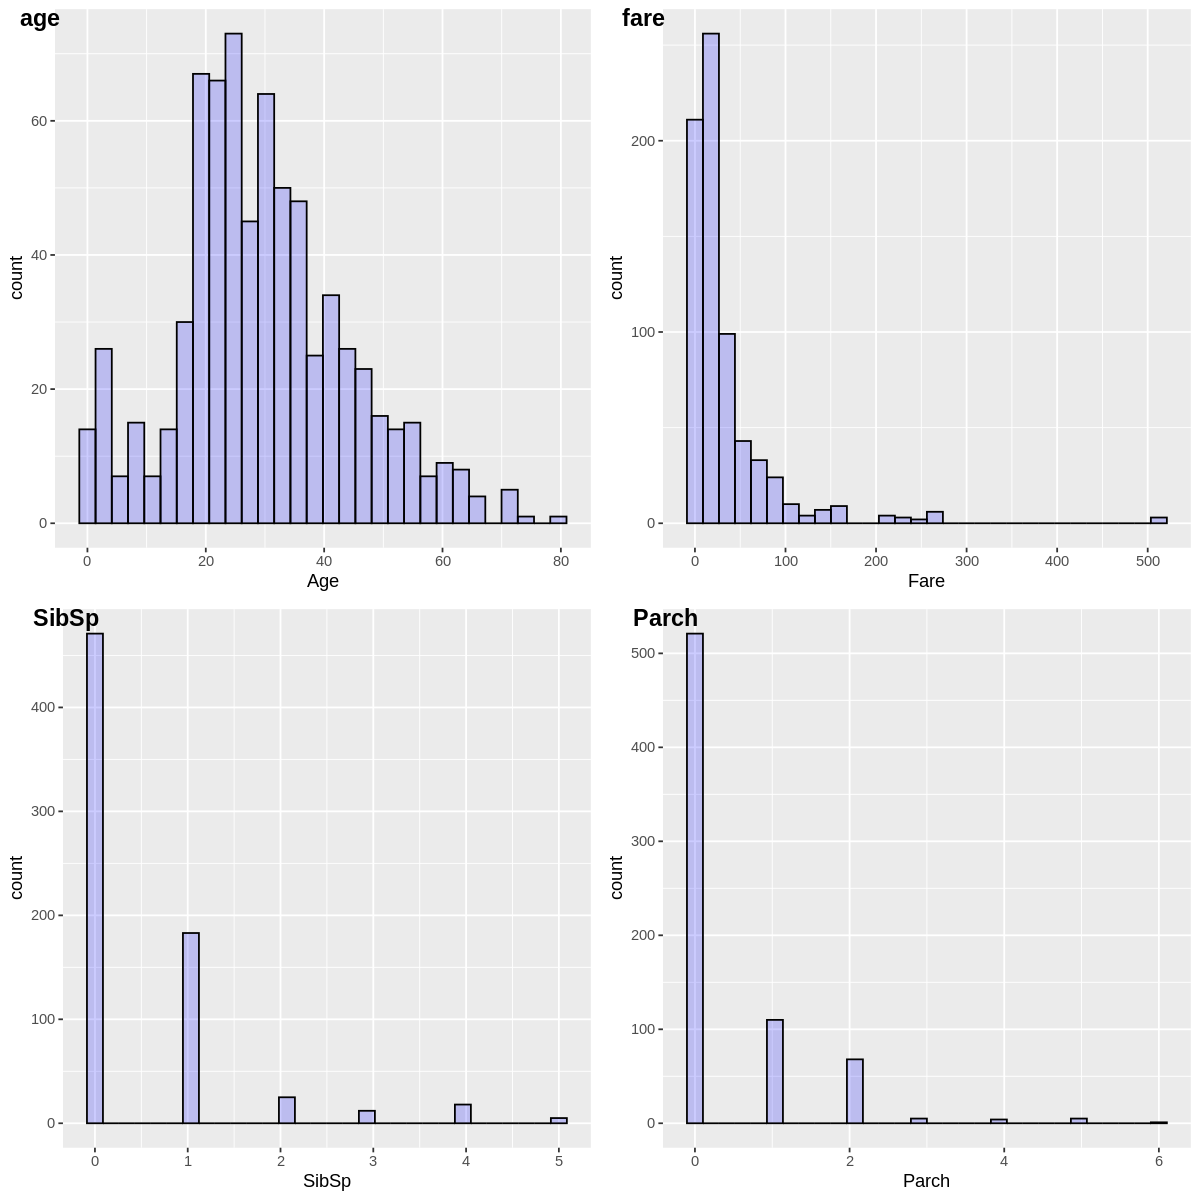

In [ ]:
# Fare / Age histogram
age <- train_pre %>% ggplot(aes(Age)) +
                  geom_histogram(col = "black", fill = "blue", alpha = 0.2)
fare <- train_pre %>% ggplot(aes(Fare)) +
                  geom_histogram(col = "black", fill = "blue", alpha = 0.2)

sibsp <- train_pre %>% ggplot(aes(SibSp)) +
                  geom_histogram(col = "black", fill = "blue", alpha = 0.2)

parch <- train_pre %>% ggplot(aes(Parch)) +
                  geom_histogram(col = "black", fill = "blue", alpha = 0.2)

ggarrange(age, fare, sibsp, parch, labels = c("age", "fare", "SibSp", "Parch"))

In [ ]:
str(train_pre)

tibble [714 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 2 2 2 ...
 $ Pclass  : int [1:714] 3 1 3 1 3 1 3 3 2 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 1 1 1 ...
 $ Age     : num [1:714] 22 38 26 35 35 54 2 27 14 4 ...
 $ SibSp   : int [1:714] 1 1 0 1 0 0 3 0 1 1 ...
 $ Parch   : int [1:714] 0 0 0 0 0 0 1 2 0 1 ...
 $ Fare    : num [1:714] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 4 4 4 2 4 ...


  * survived : 생존=1, 죽음=0
  * pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
  * sibsp : 함께 탑승한 형제 또는 배우자 수
  * parch : 함께 탑승한 부모 또는 자녀 수
  * ticket : 티켓 번호
  * cabin : 선실 번호
  * fare : 여객 운임
  * embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

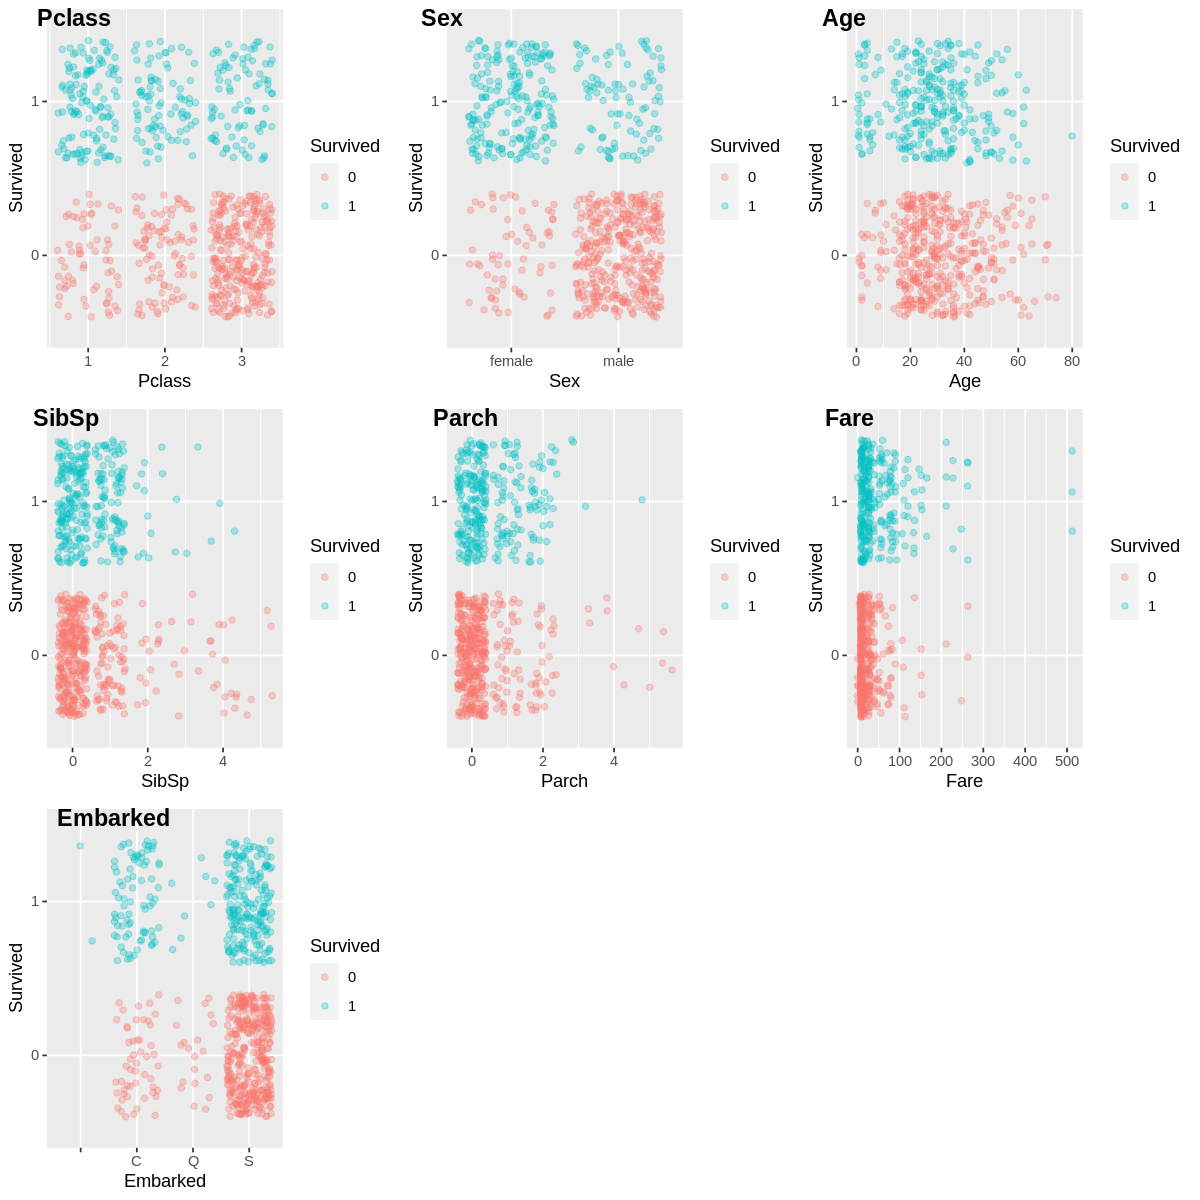

In [ ]:
p1 <- train_pre %>% ggplot(aes(Pclass, Survived)) + geom_jitter(aes(col = Survived), alpha = 0.3)
p2 <- train_pre %>% ggplot(aes(Sex, Survived)) + geom_jitter(aes(col = Survived), alpha = 0.3)
p3 <- train_pre %>% ggplot(aes(Age, Survived)) + geom_jitter(aes(col = Survived), alpha = 0.3)
p4 <- train_pre %>% ggplot(aes(SibSp, Survived)) + geom_jitter(aes(col = Survived), alpha = 0.3)
p5 <- train_pre %>% ggplot(aes(Parch, Survived)) + geom_jitter(aes(col = Survived), alpha = 0.3)
p6 <- train_pre %>% ggplot(aes(Fare, Survived)) + geom_jitter(aes(col = Survived), alpha = 0.3)
p7 <- train_pre %>% ggplot(aes(Embarked, Survived)) + geom_jitter(aes(col = Survived), alpha = 0.3)

ggarrange(p1, p2, p3, p4, p5, p6, p7, labels = c("Pclass", "Sex","Age","SibSp","Parch","Fare","Embarked"))

* **train_pre을 이용한 glm 모델 생성**

In [ ]:
m <- glm(Survived ~ ., data = train_pre, family = "binomial")
summary(m)


Call:
glm(formula = Survived ~ ., family = "binomial", data = train_pre)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7233  -0.6439  -0.3772   0.6288   2.4457  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.894850 607.855474   0.029  0.97651    
Pclass       -1.199251   0.164619  -7.285 3.22e-13 ***
Sexmale      -2.638476   0.222256 -11.871  < 2e-16 ***
Age          -0.043350   0.008232  -5.266 1.39e-07 ***
SibSp        -0.363208   0.129017  -2.815  0.00487 ** 
Parch        -0.060270   0.123900  -0.486  0.62666    
Fare          0.001432   0.002531   0.566  0.57165    
EmbarkedC   -12.257443 607.855250  -0.020  0.98391    
EmbarkedQ   -13.080988 607.855453  -0.022  0.98283    
EmbarkedS   -12.658656 607.855228  -0.021  0.98339    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual dev

* **유의하지 않은 설명변수 제거(step 이용)**

In [ ]:
m_2 <- step(m, direction = "backward")

Start:  AIC=652.34
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

           Df Deviance    AIC
- Embarked  3   635.81 649.81
- Parch     1   632.58 650.58
- Fare      1   632.68 650.68
<none>          632.34 652.34
- SibSp     1   640.91 658.91
- Age       1   662.75 680.75
- Pclass    1   686.64 704.64
- Sex       1   808.42 826.42

Step:  AIC=649.81
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare

         Df Deviance    AIC
- Parch   1   636.07 648.07
- Fare    1   636.62 648.62
<none>        635.81 649.81
- SibSp   1   645.25 657.25
- Age     1   667.62 679.62
- Pclass  1   695.26 707.26
- Sex     1   815.18 827.18

Step:  AIC=648.07
Survived ~ Pclass + Sex + Age + SibSp + Fare

         Df Deviance    AIC
- Fare    1   636.72 646.72
<none>        636.07 648.07
- SibSp   1   647.23 657.23
- Age     1   667.86 677.86
- Pclass  1   699.21 709.21
- Sex     1   820.07 830.07

Step:  AIC=646.72
Survived ~ Pclass + Sex + Age + SibSp

         Df Deviance    AIC
<n

In [ ]:
summary(m_2)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = "binomial", 
    data = train_pre)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7714  -0.6445  -0.3836   0.6276   2.4585  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.600846   0.543441  10.306  < 2e-16 ***
Pclass      -1.317398   0.140900  -9.350  < 2e-16 ***
Sexmale     -2.623483   0.214524 -12.229  < 2e-16 ***
Age         -0.044385   0.008155  -5.442 5.26e-08 ***
SibSp       -0.376119   0.121080  -3.106  0.00189 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 636.72  on 709  degrees of freedom
AIC: 646.72

Number of Fisher Scoring iterations: 5


``Survived = -1.317398 * Pclass + -2.623483 * Sex + -0.044385 * Age + -0.376119 * SibSp + 5.600846``

* **test를 이용한 예측**

In [ ]:
test_set <- fread("ftp://210.115.229.94/2020_datascience/titanic/test.csv") %>%
 as_tibble()
str(test_set)

tibble [418 × 11] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:418] 892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int [1:418] 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr [1:418] "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr [1:418] "male" "female" "male" "male" ...
 $ Age        : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr [1:418] "330911" "363272" "240276" "315154" ...
 $ Fare       : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr [1:418] "" "" "" "" ...
 $ Embarked   : chr [1:418] "Q" "S" "Q" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
summary(test_set)

  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

In [ ]:
test_pre <- test_set %>% na.omit() %>% 
 select(-PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Sex","Embarked"), factor)
summary(test_pre)

     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:127   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :204   1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :2.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.142                Mean   :30.18   Mean   :0.4834   Mean   :0.3988  
 3rd Qu.:3.000                3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :6.0000  
      Fare        Embarked
 Min.   :  0.00   C: 82   
 1st Qu.:  8.05   Q: 22   
 Median : 16.00   S:227   
 Mean   : 40.98           
 3rd Qu.: 40.63           
 Max.   :512.33           

* **예측(predict)**

In [ ]:
predict(m_2, newdata = test_pre, type = "response") %>%
  tibble(predict_survived = .) %>% bind_cols(test_pre, .)

Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict_survived
<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>,<dbl>
3,male,34.5,0,0,7.8292,Q,0.07543138
3,female,47.0,1,0,7.0000,S,0.30713487
2,male,62.0,0,0,9.6875,Q,0.08246739
3,male,27.0,0,0,8.6625,S,0.10218138
3,female,22.0,1,1,12.2875,S,0.57348133
3,male,14.0,0,0,9.2250,S,0.16851095
3,female,30.0,0,0,7.6292,Q,0.57861996
2,male,26.0,1,1,29.0000,S,0.23369652
3,female,18.0,0,0,7.2292,C,0.70050991
